In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import gensim
import string

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import train_test_split


C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan', 'ia','bahwa','oleh']
data = stop_factory.get_stop_words()+more_stopword
stopword = stop_factory.create_stop_word_remover()

Fact = StemmerFactory()
stemmer = Fact.create_stemmer()
# lemmatizer = WordNetLemmatizer()

In [3]:
cwd = os.getcwd()
data_path = os.path.join(cwd, 'dataset')

files = []
for file in os.listdir(data_path):
    if file.endswith('.csv'):
        files.append(os.path.join(data_path, file))
        
print(files, len(files))

['C:\\Users\\LENOVO\\GitHub\\capstone_bangkit\\dataset\\250 news with valid hoax label.csv', 'C:\\Users\\LENOVO\\GitHub\\capstone_bangkit\\dataset\\500_berita_indonesia.csv', 'C:\\Users\\LENOVO\\GitHub\\capstone_bangkit\\dataset\\600 news with valid hoax label.csv', 'C:\\Users\\LENOVO\\GitHub\\capstone_bangkit\\dataset\\df_processed.csv', 'C:\\Users\\LENOVO\\GitHub\\capstone_bangkit\\dataset\\Scrapping.csv'] 5


In [4]:
raw_data1 = pd.read_csv(files[1], sep = ';', encoding_errors = 'ignore')
raw_data2 = pd.read_csv(files[2], sep = ';', encoding_errors = 'ignore')
raw_data3 = pd.read_csv(files[4], sep = ';', encoding_errors = 'ignore')

In [5]:
raw_data1.sample(5)

,kategori,berita
164,valid,Beijing - Pemerintah China menyebut virus coro...
478,hoax,"""Sejumlah anggota Komunitas Reyog Ponorogo (KR..."
56,valid,Madrid - Liverpool tampil sebagai juara Liga C...
377,hoax,"""Ahok Bohong tentang Pengadaan Unit Busway dar..."
173,valid,"Bom Bunuh Diri di Manchester Arena, Inggris (2..."


In [6]:
raw_data2.sample(5)

,berita,tagging
444,Markas Besar (Mabes) Polri memburu penyebar ho...,Valid
141,"Saat pertama diluncurkan dua tahun lalu, iPhon...",Valid
128,Setelah beberapa minggu berada di pasaran dan ...,Hoax
520,Menteri Komunikasi dan Informatika (Kominfo) R...,Valid
187,Komunitas paguyuban kesenian reog ponorogo Jab...,Hoax


In [7]:
raw_data3.sample(5)

,Label,Headline,Body,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
486,0,Foto Jokowi dan Megawati Potong Tumpeng Di Ata...,Sumber: Whatsapp Narasi: Beredar foto Presiden...,NaN,NaN,NaN,NaN
664,0,BREAKING NEWS! NAMA ANIES MASUK DAFTAR TAMU A...,"Foto sudah disunting, foto asli bisa ditemukan...",NaN,NaN,NaN,NaN
1034,0,Yusril Menyatakan Bahwa Warga Luar Batang Seb...,Sumber : Media Daring Narasi : Kuasa Hukum war...,NaN,NaN,NaN,NaN
518,0,Makan Mie dan Cokelat Berbahaya,Sumber: Media Pesan Narasi: Prof.Dr.Ir. Rokhmi...,NaN,NaN,NaN,NaN
410,1,TIDAK ADA PENGRUSAKKAN PANGGUNG ISTIGHOSAH OLE...,Kapolres Nganjuk AKBP Dewa Nyoman Nanta memban...,NaN,NaN,NaN,NaN


In [8]:
data3 = raw_data3.drop(columns = raw_data3.columns[3:])
data3.sample(5)

,Label,Headline,Body
769,0,Abu Janda Sebenarnya adalah Cina Kafir,SUMBER: https://www.kaskus.co.id/show_post/555...
44,1,Foto Ridwan Kamil dan Sukmawati Soekarnoputri ...,Calon Gubernur (Cagub) Jawa Barat (Jabar) yang...
36,1,"Diduga Stres Setelah Cerai dengan Istrinya, Su...",Kepala Polres Kendal AKBP Adiwijaya menjelaska...
499,0,"Indonesia Stop Bahas Soal Muslim Rohingnya, Ur...",SUMBER:http://id.ucnews.ucweb.com/story/950261...
564,0,TNI Mengancam Polri,Sumber: Media Sosial (https://www.facebook.com...


In [9]:
data1 = raw_data1[['berita', 'kategori']]
data1.rename(columns = {'kategori' : 'label'}, inplace = True)

data2 = raw_data2.rename(columns = {'tagging' : 'label'})

data3 = raw_data3[['Body', 'Label']]
data3.rename(columns = {'Label' : 'label', 'Body' : 'berita'}, inplace = True)

data1.columns, data2.columns, data3.columns


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11488\2853940649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.rename(columns = {'Label' : 'label', 'Body' : 'berita'}, inplace = True)


(Index(['berita', 'label'], dtype='object'),
 Index(['berita', 'label'], dtype='object'),
 Index(['berita', 'label'], dtype='object'))

In [10]:
df = pd.concat([data1, data2, data3], ignore_index = True)
df.sample(5)

,berita,label
1216,Jelang pengumuman Ketua TKN pasangan Capres da...,1
544,"Di jejaring sosial, banyak beredar informasi y...",Valid
1073,Gaji presiden yang besarnya hanya sekitar Rp 6...,Hoax
1991,SUMBER:https://www.facebook.com/PTBadak/?fref=...,0
1362,Wakil Ketua Komisi Hukum Majelis Ulama Indones...,1


In [11]:
df.label.unique()

array(['valid', 'hoax', 'Valid', 'Hoax', 1, 0], dtype=object)

In [12]:
df.label = df.label.replace(['valid', 'hoax', 'Valid', 'Hoax'], [0, 1, 0, 1])
df.label.unique()

array([0, 1], dtype=int64)

In [13]:
df.head()

,berita,label
0,"""Gunung Agung erupsi untuk pertama kali pada 2...",0
1,"""Jakarta, CNN Indonesia -- Menteri BUMN Erick ...",0
2,"""Dosen Fakultas Kedokteran Hewan IPB, Yusuf Ri...",0
3,"""Jakarta - Dua anggota TNI, Serda N dan Serda ...",0
4,"""Akui Tembak Jatuh Pesawat Ukraina, Iran Tuai ...",0


<Axes: xlabel='label'>

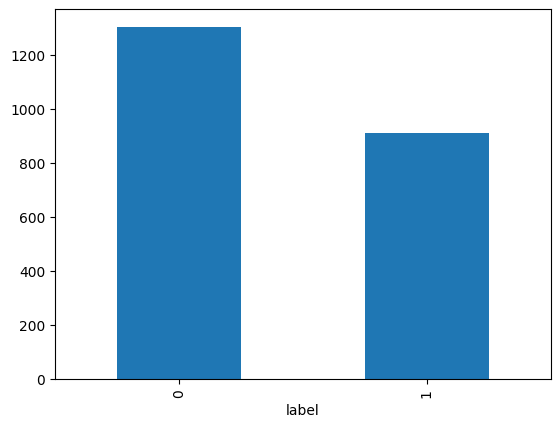

In [14]:
df.label.value_counts().plot(kind = 'bar')

In [15]:
df[df.duplicated()]

,berita,label
20,"""Jokowi Dapat Anugerah Adat Kehormatan Maluku""",0
21,"""Maluku, CNN Indonesia -- Presiden Joko Widodo...",0
80,"Bencana tanah longsor menerjang kota Mocoa, Ko...",0
175,"Serangan Bom Truk di Mogadishu, Somalia (14 Ok...",0
318,"""APA yang ada dalam pikiran Anda ketika meliha...",1
320,"""Jakarta, HanTer – Rencana pemerintah yang ing...",1
377,"""Ahok Bohong tentang Pengadaan Unit Busway dar...",1
472,"""Info dari BMKG besok diprediksi Bengkulu akan...",1
489,"""SMS Dukungan Buat Jokowi di Pilpres 2019, MUI...",1
490,"""China Menunggu Kekacauan Indonesia, Bila Indo...",1


In [16]:
df = df.drop_duplicates()
df[df.duplicated()]

,berita,label


In [17]:
df.shape

(2198, 2)

In [18]:
df.berita[0]

'"Gunung Agung erupsi untuk pertama kali pada 21 November 2017. Letusan terjadi pada pukul 17.05 Wita. Asap teramati bertekanan sedang dengan warna kelabu tebal dan dengan ketinggian maksimum sekitar 700 m di atas puncak. Abu letusan bertiup lemah ke arah Timur-Tenggara. Masyarakat diminta tetap tenang dan selalu mengikuti rekomendasi PVMBG. Gunung Agung yang terletak di Kabupaten Karangasem Provinsi Bali ini kembali erupsi pada Sabtu 25 November 2017 pukul 17.30 Wita. Abu bertekanan sedang setinggi 1.500 m keluar di atas puncak Gunung Agung. Ini merupakan erupsi kedua. Kepala Pusat Data Informasi dan Humas Badan Nasional Penanggulangan Bencana (BNPB) Sutopo Purwo Nugroho mengatakan, erupsi secara visual teramati dari daerah Culik dan Batulompeh ke arah Barat- Barat daya, asap kelabu-kehitaman tekanan sedang. Dia menuturkan, status Gunung Agung tetap Siaga (level 3). Hingga kemudian, Pusat Vulkanologi dan Mitigasi Bencana Geologi (PVMBG) menaikkan status Gunung Agung dari Siaga atau le

In [19]:
archive_path = os.path.join(data_path, 'archive', 'Summarized')
tempo_sum = pd.read_excel(os.path.join(archive_path, 'dataset_tempo_summarized.xlsx'), index_col = 'index')
cnn_sum = pd.read_excel(os.path.join(archive_path, 'dataset_cnn_summarized.xlsx'), index_col = 'index')
kompas_sum = pd.read_excel(os.path.join(archive_path, 'dataset_kompas_summarized.xlsx'), index_col = 'index')
tbhoax_sum = pd.read_excel(os.path.join(archive_path, 'dataset_turnbackhoax_summarized.xlsx'), index_col = 'index')

In [20]:
tempo_sum.sample(5)

,title,raw timestamp,original,tags,author,url,cleaned,label,timestamp,cleaned token length,summarized
index,,,,,,,,,,,
4130,Cak Imin Ngarep Jadi Wakil Puan Maharani di 20...,"Senin, 26 September 2022 15:31 WIB","TEMPO.CO, Jakarta - Ketua Umum Gerindra Prabow...",Prabowo;Puan Maharani;Cak Imin;Pilpres 2024;Mu...,Reporter Ima Dini Shafira Editor Amirullah,https://nasional.tempo.co/read/1638518/cak-imi...,Cak Imin Ngarep Jadi Wakil Puan Maharani di 20...,0,2022-09-26 15:31:00,113,"Ditanya ihwal peluang Puan menjadi cawapres, P..."
4701,Deretan Relawan Anies Baswedan Menjelang Pilpr...,"Minggu, 30 Oktober 2022 22:00 WIB","TEMPO.CO, Jakarta -Pada Senin, 3 Oktober 2022,...",Anies;Relawan Anies;Anies Baswedan;Pilpres 202...,Reporter Eiben Heizar Editor Dwi Arjanto,https://nasional.tempo.co/read/1651145/deretan...,Deretan Relawan Anies Baswedan Menjelang Pilpr...,0,2022-10-30 22:00:00,85,HEAVEN HEIZIERBaca juga : Ini Tanggapan Presid...
1971,"Megawati Absen di Pernikahan Adik Jokowi, Paka...","Jumat, 27 Mei 2022 13:26 WIB","TEMPO.CO, Jakarta - Pengamat politik dari Univ...",Megawati;Jokowi;Puan Maharani;Anwar Usman;PDIP,Reporter M Julnis Firmansyah Editor Eko Ari Wi...,https://nasional.tempo.co/read/1595630/megawat...,"Megawati Absen di Pernikahan Adik Jokowi, Paka...",0,2022-05-27 13:26:00,410,Presiden Jokowi dan Wakil Presiden Ma'ruf Amin...
266,Golkar Bantah Isu Akan Usung Anies Baswedan di...,"Senin, 24 Januari 2022 06:58 WIB","TEMPO.CO, Yogyakarta - Ketua Badan Pemenangan ...",Anies Baswedan;Golkar;Pilpres 2024;Airlangga;C...,Reporter Pribadi Wicaksono (Kontributor) Edito...,https://nasional.tempo.co/read/1553221/golkar-...,Golkar Bantah Isu Akan Usung Anies Baswedan di...,0,2022-01-24 06:58:00,287,Golkar Bantah Isu Akan Usung Anies Baswedan di...
2896,Pimpinan MPR Sepakat Hidupkan PPHN Tanpa Amand...,"Kamis, 7 Juli 2022 18:45 WIB","TEMPO.CO, Jakarta - Ketua Majelis Permusyawara...",PPHN;Amandemen UUD 1945;MPR;Bambang Soesatyo;a...,Reporter Dewi Nurita Editor Kukuh S. Wibowo,https://nasional.tempo.co/read/1609735/pimpina...,Pimpinan MPR Sepakat Hidupkan PPHN Tanpa Amand...,0,2022-07-07 18:45:00,47,Pembahasan PPHN Digelar Maraton dan Tertutup (...


In [21]:
cnn_sum.sample(5)

,title,raw timestamp,original,tags,author,url,cleaned,label,timestamp,cleaned token length,summarized
index,,,,,,,,,,,
4161,Riza Patria soal Gerindra Belum Pecat Taufik: ...,"Kamis, 21 Jul 2022 15:49 WIB","Jakarta, CNN Indonesia -- Ketua DPD Gerindra D...",prabowo subianto;partai gerindra;m taufik,CNN Indonesia,https://www.cnnindonesia.com/nasional/20220721...,Riza Patria soal Gerindra Belum Pecat Taufik: ...,0,2022-07-21 15:49:00,342,Ketua DPD Gerindra DKI Jakarta Ahmad Riza Patr...
6762,"DPR: Maksud Brigjen Junior Tumilaar Baik, tapi...","Rabu, 23 Feb 2022 13:48 WIB","Jakarta, CNN Indonesia -- Anggota Komisi I DPR...",brigjen junior tumilaar;dpr;golkar;sentul city...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20220223...,"DPR: Maksud Brigjen Junior Tumilaar Baik, tapi...",0,2022-02-23 13:48:00,367,"Anggota Komisi I DPR dari Fraksi Golkar, Bobby..."
5917,KPU Buka Kemungkinan Bahas Anggaran Pemilu Saa...,"Selasa, 12 Apr 2022 22:18 WIB","Jakarta, CNN Indonesia -- Komisi Pemilihan Umu...",kpu;pemilu;pemilu 2024;anggaran pemilu,CNN Indonesia,https://www.cnnindonesia.com/nasional/20220412...,KPU Buka Kemungkinan Bahas Anggaran Pemilu Saa...,0,2022-04-12 22:18:00,384,Komisi Pemilihan Umum (KPU) membuka peluang me...
6798,Istri Oded dan Ketua DPD PKS Diusulkan Jadi Wa...,"Senin, 21 Feb 2022 21:16 WIB","Jakarta, CNN Indonesia -- Dewan Pimpinan Pusat...",oded m danial;kang oded;oded m danial meningga...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20220221...,Istri Oded dan Ketua DPD PKS Diusulkan Jadi Wa...,0,2022-02-21 21:16:00,310,Dewan Pimpinan Pusat Partai Keadilan Sejahtera...
4014,PKB dan Gerindra Daftar Pemilu Bareng ke KPU 8...,"Senin, 01 Agu 2022 15:38 WIB","Jakarta, CNN Indonesia -- Dewan Pimpinan Pusat...",kpu;daftar parpol;daftar partai yang sudah men...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20220801...,PKB dan Gerindra Daftar Pemilu Bareng ke KPU 8...,0,2022-08-01 15:38:00,312,Dewan Pimpinan Pusat ( DPP ) PKB berencana mel...


In [22]:
kompas_sum.sample(5)

,title,raw timestamp,original,tags,author,url,cleaned,label,timestamp,cleaned token length,summarized
index,,,,,,,,,,,
2674,"Habiskan Dana Kampanye Rp 736,3 Miliar, Donald...","Kompas.com - 21/07/2020, 18:43 WIB","WASHINGTON DC, KOMPAS.com - Presiden Amerika ...",Joe Biden;Donald Trump;dana kampanye;pemilihan...,Penulis Shintaloka Pradita Sicca | Editor Shin...,http://www.kompas.com/global/read/2020/07/21/1...,"Habiskan Dana Kampanye Rp 736,3 Miliar, Donald...",0,2020-07-21 18:43:00,480,Donald Trump habiskan dana kampanye lebih dari...
1939,"Kubu Moeldoko Uji Materi AD/ART, Demokrat: Car...","Kompas.com - 23/09/2021, 21:38 WIB","JAKARTA, KOMPAS.com - Ketua DPP Partai Demokra...",Yusril Izha Mahendra;partai demokrat;Moeldoko;...,Penulis Ardito Ramadhan | Editor Krisiandi,http://nasional.kompas.com/read/2021/09/23/213...,"Kubu Moeldoko Uji Materi AD/ART, Demokrat: Car...",0,2021-09-23 21:38:00,553,Ketua DPP Partai Demokrat Didik Mukrianto meni...
3499,Wapres Minta Masjid Tak Dijadikan Tempat Berpo...,"Kompas.com - 27/02/2019, 18:22 WIB","JAKARTA, KOMPAS.com - Wakil Presiden Jusuf Kal...",politik;Jusuf Kalla;masjid,Penulis Rakhmat Nur Hakim | Editor Krisiandi,http://nasional.kompas.com/read/2019/02/27/182...,Wapres Minta Masjid Tak Dijadikan Tempat Berpo...,0,2019-02-27 18:22:00,278,Wakil Presiden Jusuf Kalla meminta masjid tak ...
2971,[POPULER NUSANTARA] Alasan Gibran Rela Tinggal...,"Kompas.com - 02/11/2019, 06:45 WIB",KOMPAS.com - Sebagai putra sulung Presiden Jo...,Gibran Rakabuming Raka;Ashanty;Jokowi;Solo,Editor Michael Hangga Wismabrata,http://regional.kompas.com/read/2019/11/02/064...,[POPULER NUSANTARA] Alasan Gibran Rela Tinggal...,0,2019-11-02 06:45:00,381,Gibran Rakabuming Rake untuk maju dalam Pilkad...
3048,"Perjalanan Politik Pengusaha Rachmat Gobel, da...","Kompas.com - 02/10/2019, 08:54 WIB","JAKARTA, KOMPAS.com - Nama Rachmat Gobel tak a...",Pimpinan DPR;Rachmat Gobel;DPR,Penulis Kristian Erdianto | Editor Bayu Galih,http://nasional.kompas.com/read/2019/10/02/085...,"Perjalanan Politik Pengusaha Rachmat Gobel, da...",0,2019-10-02 08:54:00,426,Rachmat Gobel memang memiliki karier politik y...


In [23]:
tbhoax_sum.sample(5)

,title,raw timestamp,original,tags,author,url,politik,raw narasi,cleaned,label,timestamp,cleaned token length,summarized
index,,,,,,,,,,,,,
8895,[BENAR] Klarifikasi Mahfud Md Terkait Tuduhan ...,"Maret 30, 2018",Prof Mahfud Md mengklarifikasi tuduhan Ratna S...,Fitnah;Hasut;Hoax,Aribowo Sasmito,https://turnbackhoax.id/2018/03/30/benar-klari...,1,,NaN,1,2018-03-30,3,NaN
7298,[SALAH] Video Merry Riana Sebut Indonesia Akan...,"Juni 11, 2019","Video yang\nmenunjukkan Merry Riana, motivator...",Fitnah;Hasut;Hoax,Muhammad Khairil,https://turnbackhoax.id/2019/06/11/salah-video...,0,\nMerry riana ikut\nbicara. Padahal dia keturu...,Merry riana ikut bicara. Padahal dia keturunan...,1,2019-06-11,1116,NaN
8967,[SALAH] SURAT PENETAPAN NIP CPNS FORMASI CALON...,"Maret 14, 2018",Postingan ini berisi mengenai bantahan langsun...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2018/03/14/salah-surat...,0,\nMenindaklanjuti surat Sekretaris Mahkamah Ag...,Menindaklanjuti surat Sekretaris Mahkamah Agun...,1,2018-03-14,106,CPNS di lingkungan Mahkamah Agung formasi tamb...
2869,[SALAH] Dokumen Bank Dunia Tetapkan Covid-19 S...,"Agustus 8, 2021",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2021/08/08/salah-dokum...,0,\n“BANYAK ORANG PIKIRKAN COVID-19 BERAKHIR 202...,BANYAK ORANG PIKIRKAN COVID-19 BERAKHIR 2021. ...,1,2021-08-08,92,DOKUMEN BANK DUNIA MENGATAKAN COVID-19 BERAKHI...
331,[SALAH] Shopee Bagi Hadiah Rp185Juta Diumumkan...,"Januari 24, 2023",Hasil periksa fakta Mochamad Marcell\nFaktanya...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/01/24/salah-shope...,0,\n“Shopee\nslmt. No Anda Resmi\nDpt Hadiah Dar...,Shopee slmt. No Anda Resmi Dpt Hadiah Dari Sho...,1,2023-01-24,409,Shopee membagikan hadiah sebesar Rp185Juta kep...


In [26]:
def pipeline(text):
    text = re.sub(r'http\S+', '', text.lower())
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans("","",string.punctuation))
#     text = tokenizer(text)
    text = stemmer.stem(text)
    text = stopword.remove(text)
    return text.split()

pipeline(cnn_sum.cleaned[0])

['anies',
 'milad',
 'bkmt',
 'aji',
 'hasil',
 'ibuibu',
 'tahu',
 'mantan',
 'gubernur',
 'dki',
 'jakarta',
 'anies',
 'baswedan',
 'hadir',
 'acara',
 'tasyakur',
 'milad',
 'tahun',
 'badan',
 'kontak',
 'majelis',
 'taklim',
 'bkmt',
 'istora',
 'senayan',
 'jakarta',
 'selasa',
 'pun',
 'puji',
 'eksistensi',
 'ibuibu',
 'aji',
 'wujud',
 'hasil',
 'didik',
 'keluarga',
 'kata',
 'lama',
 'tahun',
 'usia',
 'bkmt',
 'jadi',
 'teladan',
 'hasil',
 'didik',
 'keluarga',
 'bkmt',
 'kata',
 'jadi',
 'bukti',
 'aji',
 'hasil',
 'ibuibu',
 'lebih',
 'tahu',
 'bkmt',
 'jadi',
 'bukti',
 'aji',
 'hasil',
 'ibuibu',
 'lebih',
 'tahu',
 'ibuibu',
 'punya',
 'bekal',
 'didik',
 'anakanaknya',
 'buat',
 'rumah',
 'cermin',
 'nilai',
 'islam',
 'akhlak',
 'baik',
 'kata',
 'anies',
 'kutip',
 'unggah',
 'akun',
 'media',
 'sosial',
 'instagram',
 'milik',
 'unggah',
 'anies',
 'singgung',
 'soal',
 'bkmt',
 'tidak',
 'lepas',
 'sosok',
 'tuty',
 'alawiyah',
 'turut',
 'anies',
 'tuty',
 'buk

In [25]:
X_processed = X.apply(lambda x : pipeline(x))

df_processed = pd.DataFrame({
    'berita' : X_processed,
    'label' : y
})

# df_processed.to_csv(os.path.join(data_path, 'df_processed.csv'))

NameError: name 'X' is not defined